# Linearly Separable Data Generation and Visualization

This section demonstrates the process of generating a **linearly separable dataset** and visualizing it. The dataset consists of two classes (`Class 0` and `Class 1`) that can be separated by a straight line. This dataset is suitable for training a perceptron model.

## Description of the Dataset
1. **Class 0**:
   - Consists of 50 points.
   - Points are shifted upwards and to the right.
   - Represented in blue on the plot.

2. **Class 1**:
   - Consists of 50 points.
   - Points are shifted downwards and to the left.
   - Represented in red on the plot.

3. **Features**:
   - The dataset is 2-dimensional, making it easy to visualize.

## Purpose
This dataset will later be used:
- To train a perceptron model for binary classification.
- To visualize the decision boundary created by the perceptron.

## Visualization
The scatter plot below shows the data points for each class. The separation between `Class 0` and `Class 1` is visually apparent, confirming that the data is linearly separable.

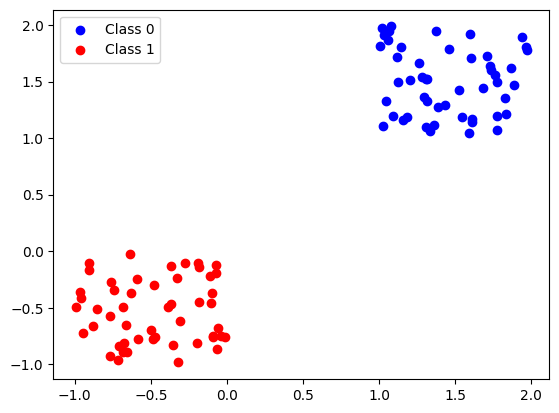

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linearly separable data
np.random.seed(42)  # Set random seed for reproducibility
class_0 = np.random.rand(50, 2) + 1  # Points for Class 0
class_1 = np.random.rand(50, 2) - 1  # Points for Class 1
X_linear = np.vstack((class_0, class_1))  # Combine both classes
y_linear = np.array([0] * 50 + [1] * 50)  # Labels for the data (0 and 1)

# Visualize the generated data
plt.scatter(X_linear[:50, 0], X_linear[:50, 1], color='blue', label='Class 0')  # Class 0 points
plt.scatter(X_linear[50:, 0], X_linear[50:, 1], color='red', label='Class 1')  # Class 1 points
plt.legend()  # Add legend to distinguish classes
plt.show()  # Display the plot

# Non-Linearly Separable Data Generation and Visualization

This section demonstrates the creation of a **non-linearly separable dataset** using the `make_moons` function from the `sklearn.datasets` module. The dataset consists of two classes (`Class 0` and `Class 1`) arranged in a crescent-shaped (moon-like) structure, making them non-linearly separable.

## Description of the Dataset
- **Class 0**:
  - Points forming the first crescent shape.
  - Represented in blue on the plot.

- **Class 1**:
  - Points forming the second crescent shape.
  - Represented in red on the plot.

- **Features**:
  - The dataset is 2-dimensional for ease of visualization.

## Purpose
This dataset will later be used:
1. To train an **MLP (Multilayer Perceptron)** for binary classification.
2. To evaluate how well the MLP can model non-linear decision boundaries.

## Visualization
The scatter plot below shows the data points for each class. The crescent-like structure makes it evident that a simple linear classifier (like a perceptron) will not be sufficient to separate these classes.

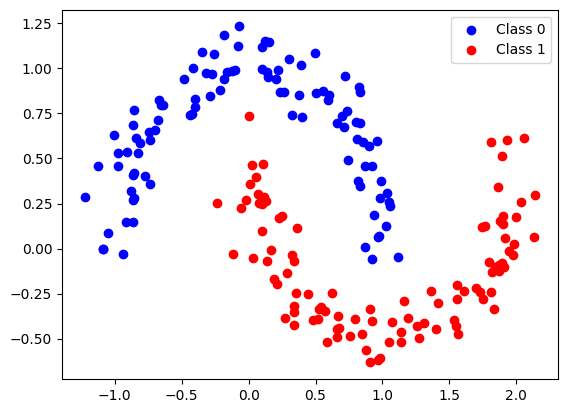

In [12]:
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X_non_linear, y_non_linear = make_moons(n_samples=200, noise=0.1, random_state=42)  # Non-linear crescent-shaped data

# Visualize the generated data
plt.scatter(X_non_linear[y_non_linear == 0, 0], X_non_linear[y_non_linear == 0, 1], color='blue', label='Class 0')  # Class 0 points
plt.scatter(X_non_linear[y_non_linear == 1, 0], X_non_linear[y_non_linear == 1, 1], color='red', label='Class 1')  # Class 1 points
plt.legend()  # Add legend to distinguish classes
plt.show()  # Display the plot


# Splitting Data into Training and Testing Sets

To evaluate the performance of our models, we divide the datasets into **training** and **testing** subsets. This ensures that the models are trained on one part of the data and tested on unseen data to measure generalization.

## Why Split the Data?
1. **Training Set**:
   - Used to train the model and optimize its parameters.
   - Consists of 80% of the dataset in this example.

2. **Testing Set**:
   - Used to evaluate the model's performance on unseen data.
   - Consists of 20% of the dataset in this example.

3. **Random State**:
   - A fixed `random_state` ensures reproducibility, meaning the split will always produce the same subsets.

In [13]:
from sklearn.model_selection import train_test_split

# Linear data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42)

# Non-linear data
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear, y_non_linear, test_size=0.2, random_state=42)

# Perceptron Training and Testing

This section demonstrates the process of initializing, training, and testing a perceptron model on a linearly separable dataset. The perceptron is a simple linear classifier that adjusts its weights iteratively based on the training data.

## Steps:
1. **Initialization**:
   - The perceptron is initialized with:
     - Learning rate (`eta`): Controls the step size during weight updates.
     - Maximum epochs (`max_epochs`): The maximum number of iterations through the training data.
     - Error threshold (`threshold`): Determines when to stop training based on error reduction.

2. **Training**:
   - The perceptron is trained on the training data (`X_train_linear`, `y_train_linear`).
   - It iteratively adjusts its weights to minimize classification error.

3. **Testing**:
   - The trained perceptron is evaluated on the test data (`X_test_linear`, `y_test_linear`).
   - The model’s accuracy on unseen data is calculated and displayed.

In [14]:
from perceptron import PerceptronAlgorithm

# Initialize the perceptron
perceptron = PerceptronAlgorithm(eta=0.01, max_epochs=1000, threshold=0.01)

# Train the perceptron
perceptron.fit(X_train_linear, y_train_linear)

# Test the perceptron
y_pred_linear = perceptron.test(X_test_linear, y_test_linear)
print("Accuracy for Perceptron:", perceptron.accuracy)

Epoch  1  ===> error =  0.35 ... 

Epoch  2  ===> error =  0.0625 ... 

Epoch  3  ===> error =  0.01875 ... 

Epoch  4  ===> error =  0.0125 ... 

Epoch  5  ===> error =  0.0 ... 

Accuracy for Perceptron: 100.0


# Multilayer Perceptron (MLP) Training and Testing

This section demonstrates the process of initializing, training, and testing a **Multilayer Perceptron (MLP)** on a **non-linearly separable dataset**. The MLP is capable of learning non-linear decision boundaries, making it suitable for more complex tasks like the `make_moons` dataset used here.

## Steps:
1. **Initialization**:
   - The MLP is initialized with:
     - Learning rate (`eta`): Controls the step size during weight updates.
     - Threshold (`threshold`): Determines the stopping condition based on error reduction.
     - Maximum epochs (`max_epochs`): Limits the number of iterations through the training data.

2. **Architecture Definition**:
   - The MLP architecture is built with:
     - `input_length`: Number of input features (dimensionality of the dataset).
     - `hidden_length`: Number of neurons in the hidden layer (set to 10 in this example).
     - `output_length`: Number of output neurons (1 for binary classification).

3. **Training**:
   - The MLP is trained on the non-linear training dataset (`X_train_non_linear`, `y_train_non_linear`) using backpropagation.

4. **Testing**:
   - The trained MLP is evaluated on the test dataset (`X_test_non_linear`, `y_test_non_linear`).
   - Accuracy is calculated as the percentage of correctly classified test samples.

In [15]:
from mlp import MLPAlgorithm

# Initialize the MLP
mlp = MLPAlgorithm(eta=0.01, threshold=0.01, max_epochs=1000)

# Build the architecture
mlp.build_architecture(
    input_length=X_train_non_linear.shape[1],  # Number of input features
    hidden_length=10,                         # Number of neurons in the hidden layer
    output_length=1                           # Number of output neurons (binary classification)
)

# Train the MLP
mlp.fit(X_train_non_linear, y_train_non_linear)

# Test the MLP
y_pred_non_linear = mlp.test(X_test_non_linear, y_test_non_linear)
print("Accuracy for MLP:", mlp.accuracy)

Epoch  100 : loss =  0.06497
Epoch  200 : loss =  0.05006
Epoch  300 : loss =  0.04639
Epoch  400 : loss =  0.04544
Epoch  500 : loss =  0.04513
Epoch  600 : loss =  0.04499
Epoch  700 : loss =  0.0449
Epoch  800 : loss =  0.04482
Epoch  900 : loss =  0.04474
Epoch  1000 : loss =  0.04465
Accuracy for MLP: 90.0


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Метрики для персептрона
accuracy = accuracy_score(y_test_linear, y_pred_linear)
precision = precision_score(y_test_linear, y_pred_linear)
recall = recall_score(y_test_linear, y_pred_linear)
f1 = f1_score(y_test_linear, y_pred_linear)
cm = confusion_matrix(y_test_linear, y_pred_linear)

print("Metrics for Perceptron:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Метрики для MLP
accuracy = accuracy_score(y_test_non_linear, y_pred_non_linear)
precision = precision_score(y_test_non_linear, y_pred_non_linear)
recall = recall_score(y_test_non_linear, y_pred_non_linear)
f1 = f1_score(y_test_non_linear, y_pred_non_linear)
cm = confusion_matrix(y_test_non_linear, y_pred_non_linear)

print("Metrics for MLP:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Metrics for Perceptron:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Metrics for MLP:
Accuracy: 0.9
Precision: 0.9375
Recall: 0.8333333333333334
F1 Score: 0.8823529411764706
Confusion Matrix:
 [[21  1]
 [ 3 15]]


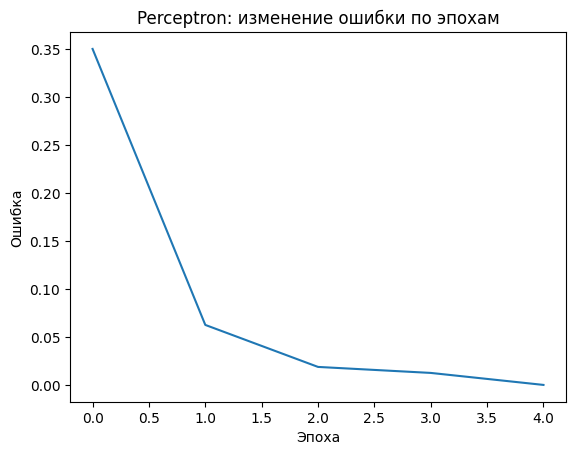

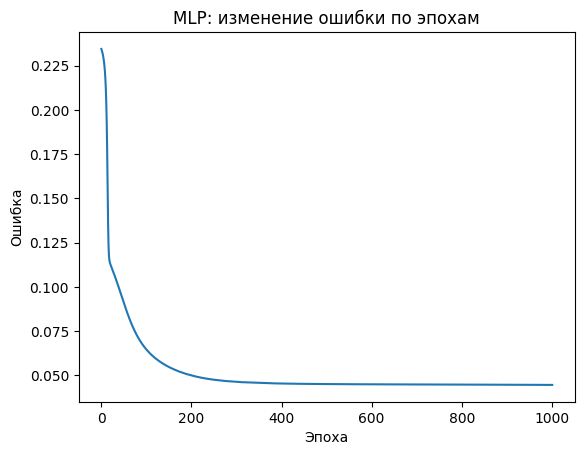

In [9]:
plt.plot(range(len(perceptron.cost_)), perceptron.cost_)
plt.title("Perceptron: изменение ошибки по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.show()

plt.plot(range(len(mlp.cost_)), mlp.cost_)
plt.title("MLP: изменение ошибки по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.show()
